## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0   5.296449  1206.064303  0.471104  1.906875  1.597176
1  86.578016   155.106073  0.892970  7.606995  1.200532
2   6.268159  1521.087207  0.709829  6.830138  1.547494
3  28.756144   473.212556  0.962010  5.368878  1.535143
4  37.021198  1079.187658  0.917518  9.460568  1.329781


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0043122	total: 57.1ms	remaining: 57s
1:	learn: 0.9962974	total: 57.6ms	remaining: 28.7s
2:	learn: 0.9862950	total: 58.1ms	remaining: 19.3s
3:	learn: 0.9783132	total: 58.5ms	remaining: 14.6s
4:	learn: 0.9696789	total: 59ms	remaining: 11.7s
5:	learn: 0.9626637	total: 59.5ms	remaining: 9.86s
6:	learn: 0.9512200	total: 59.9ms	remaining: 8.5s
7:	learn: 0.9410804	total: 60.4ms	remaining: 7.49s
8:	learn: 0.9342960	total: 60.8ms	remaining: 6.69s
9:	learn: 0.9264903	total: 61.3ms	remaining: 6.07s
10:	learn: 0.9192387	total: 61.8ms	remaining: 5.55s
11:	learn: 0.9100823	total: 62.3ms	remaining: 5.13s
12:	learn: 0.9038227	total: 62.6ms	remaining: 4.75s
13:	learn: 0.8963079	total: 63.1ms	remaining: 4.45s
14:	learn: 0.8864891	total: 63.5ms	remaining: 4.17s
15:	learn: 0.8803590	total: 63.9ms	remaining: 3.93s
16:	learn: 0.8721448	total: 64.4ms	remaining: 3.72s
17:	learn: 0.8641369	total: 64.8ms	remaining: 3.54s
18:	learn: 0.8583011	total: 65.2ms	remaining: 3.3

123:	learn: 0.4022052	total: 109ms	remaining: 771ms
124:	learn: 0.3996274	total: 110ms	remaining: 768ms
125:	learn: 0.3968000	total: 110ms	remaining: 763ms
126:	learn: 0.3944423	total: 111ms	remaining: 760ms
127:	learn: 0.3918118	total: 111ms	remaining: 755ms
128:	learn: 0.3895990	total: 111ms	remaining: 752ms
129:	learn: 0.3874887	total: 112ms	remaining: 747ms
130:	learn: 0.3855889	total: 112ms	remaining: 743ms
131:	learn: 0.3830957	total: 112ms	remaining: 739ms
132:	learn: 0.3804051	total: 113ms	remaining: 736ms
133:	learn: 0.3786712	total: 113ms	remaining: 733ms
134:	learn: 0.3761651	total: 114ms	remaining: 729ms
135:	learn: 0.3747746	total: 114ms	remaining: 725ms
136:	learn: 0.3727390	total: 114ms	remaining: 721ms
137:	learn: 0.3712805	total: 115ms	remaining: 717ms
138:	learn: 0.3692073	total: 115ms	remaining: 714ms
139:	learn: 0.3672471	total: 116ms	remaining: 710ms
140:	learn: 0.3654108	total: 116ms	remaining: 707ms
141:	learn: 0.3637706	total: 117ms	remaining: 705ms
142:	learn: 

297:	learn: 0.1836859	total: 186ms	remaining: 438ms
298:	learn: 0.1829684	total: 186ms	remaining: 437ms
299:	learn: 0.1821724	total: 187ms	remaining: 436ms
300:	learn: 0.1816907	total: 187ms	remaining: 435ms
301:	learn: 0.1809805	total: 188ms	remaining: 434ms
302:	learn: 0.1802517	total: 188ms	remaining: 433ms
303:	learn: 0.1795774	total: 189ms	remaining: 432ms
304:	learn: 0.1788620	total: 189ms	remaining: 431ms
305:	learn: 0.1780948	total: 189ms	remaining: 430ms
306:	learn: 0.1773964	total: 190ms	remaining: 428ms
307:	learn: 0.1767063	total: 190ms	remaining: 427ms
308:	learn: 0.1759394	total: 191ms	remaining: 426ms
309:	learn: 0.1751155	total: 191ms	remaining: 425ms
310:	learn: 0.1744817	total: 191ms	remaining: 424ms
311:	learn: 0.1737258	total: 192ms	remaining: 423ms
312:	learn: 0.1730048	total: 192ms	remaining: 422ms
313:	learn: 0.1723739	total: 193ms	remaining: 421ms
314:	learn: 0.1717934	total: 193ms	remaining: 420ms
315:	learn: 0.1710806	total: 194ms	remaining: 419ms
316:	learn: 

539:	learn: 0.1026915	total: 292ms	remaining: 248ms
540:	learn: 0.1022203	total: 292ms	remaining: 248ms
541:	learn: 0.1020723	total: 292ms	remaining: 247ms
542:	learn: 0.1018921	total: 293ms	remaining: 246ms
543:	learn: 0.1016600	total: 293ms	remaining: 246ms
544:	learn: 0.1012035	total: 293ms	remaining: 245ms
545:	learn: 0.1010270	total: 294ms	remaining: 244ms
546:	learn: 0.1008827	total: 294ms	remaining: 244ms
547:	learn: 0.1007079	total: 295ms	remaining: 243ms
548:	learn: 0.1006005	total: 295ms	remaining: 242ms
549:	learn: 0.1004275	total: 295ms	remaining: 242ms
550:	learn: 0.1003212	total: 296ms	remaining: 241ms
551:	learn: 0.1001786	total: 296ms	remaining: 240ms
552:	learn: 0.1000070	total: 297ms	remaining: 240ms
553:	learn: 0.0999015	total: 297ms	remaining: 239ms
554:	learn: 0.0997314	total: 298ms	remaining: 239ms
555:	learn: 0.0996271	total: 298ms	remaining: 238ms
556:	learn: 0.0994221	total: 299ms	remaining: 237ms
557:	learn: 0.0993187	total: 299ms	remaining: 237ms
558:	learn: 

714:	learn: 0.0721381	total: 368ms	remaining: 147ms
715:	learn: 0.0720816	total: 369ms	remaining: 146ms
716:	learn: 0.0719829	total: 369ms	remaining: 146ms
717:	learn: 0.0718736	total: 369ms	remaining: 145ms
718:	learn: 0.0717762	total: 370ms	remaining: 144ms
719:	learn: 0.0716789	total: 370ms	remaining: 144ms
720:	learn: 0.0715826	total: 370ms	remaining: 143ms
721:	learn: 0.0714761	total: 371ms	remaining: 143ms
722:	learn: 0.0713992	total: 371ms	remaining: 142ms
723:	learn: 0.0713033	total: 372ms	remaining: 142ms
724:	learn: 0.0712076	total: 372ms	remaining: 141ms
725:	learn: 0.0711132	total: 373ms	remaining: 141ms
726:	learn: 0.0708594	total: 373ms	remaining: 140ms
727:	learn: 0.0707655	total: 374ms	remaining: 140ms
728:	learn: 0.0707157	total: 374ms	remaining: 139ms
729:	learn: 0.0706227	total: 375ms	remaining: 139ms
730:	learn: 0.0705298	total: 375ms	remaining: 138ms
731:	learn: 0.0704382	total: 375ms	remaining: 137ms
732:	learn: 0.0703893	total: 376ms	remaining: 137ms
733:	learn: 

954:	learn: 0.0494357	total: 474ms	remaining: 22.3ms
955:	learn: 0.0494107	total: 474ms	remaining: 21.8ms
956:	learn: 0.0492101	total: 475ms	remaining: 21.3ms
957:	learn: 0.0491264	total: 475ms	remaining: 20.8ms
958:	learn: 0.0491018	total: 476ms	remaining: 20.3ms
959:	learn: 0.0490199	total: 476ms	remaining: 19.8ms
960:	learn: 0.0489845	total: 476ms	remaining: 19.3ms
961:	learn: 0.0489046	total: 477ms	remaining: 18.8ms
962:	learn: 0.0487041	total: 477ms	remaining: 18.3ms
963:	learn: 0.0484890	total: 477ms	remaining: 17.8ms
964:	learn: 0.0484204	total: 478ms	remaining: 17.3ms
965:	learn: 0.0483461	total: 478ms	remaining: 16.8ms
966:	learn: 0.0481667	total: 479ms	remaining: 16.3ms
967:	learn: 0.0479729	total: 479ms	remaining: 15.8ms
968:	learn: 0.0477978	total: 480ms	remaining: 15.3ms
969:	learn: 0.0476088	total: 480ms	remaining: 14.8ms
970:	learn: 0.0474379	total: 481ms	remaining: 14.4ms
971:	learn: 0.0472707	total: 481ms	remaining: 13.9ms
972:	learn: 0.0470867	total: 482ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

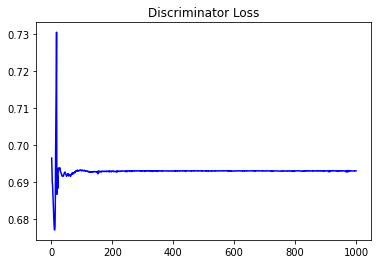

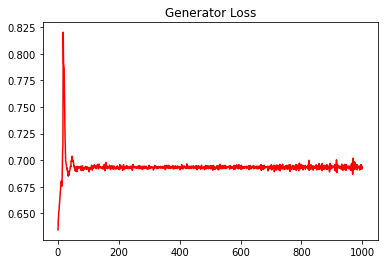

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.18353877097561058


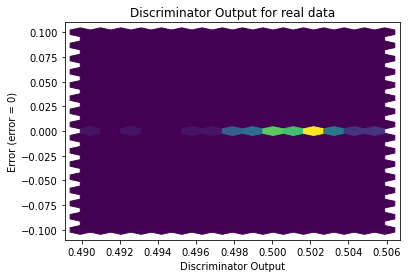

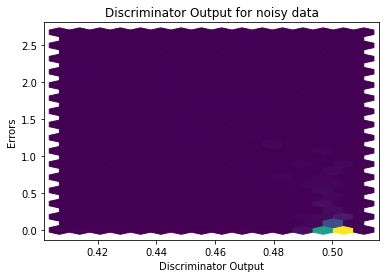

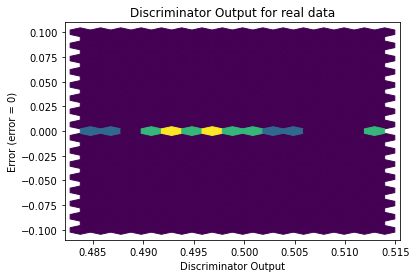

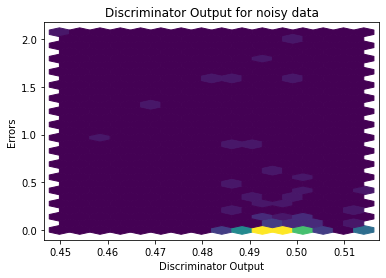

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


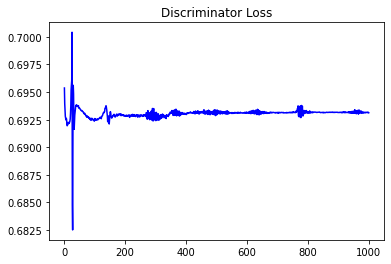

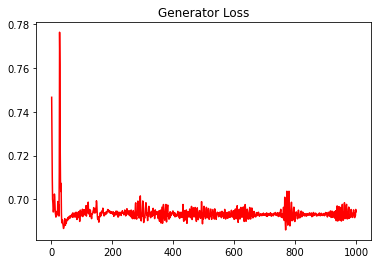

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.16758698061241883


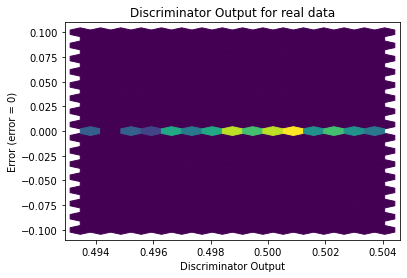

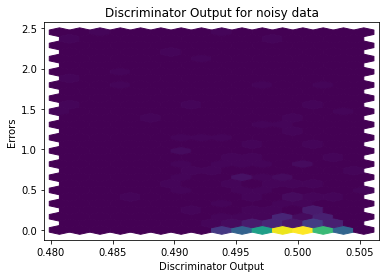

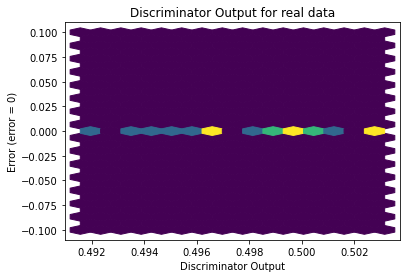

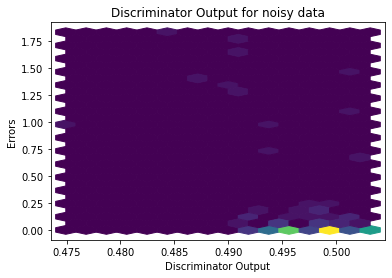

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0903]], requires_grad=True)
